In [377]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [378]:
stock='NTPC.NS'
data=yf.download(stock,'2021-08-28','2023-08-25',interval='1h')

[*********************100%***********************]  1 of 1 completed


In [379]:
data['High-Low'] = data['High'] - data['Low']
data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))
data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis=1, inplace=True)

period = 14

data['ATR'] = data['TrueRange'].rolling(period).mean()
data.drop('TrueRange', axis=1, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,ATR
Datetime,,,,,,,
2021-08-30 09:15:00+05:30,113.300003,114.550003,113.250000,114.300003,114.300003,0,NaN
2021-08-30 10:15:00+05:30,114.300003,114.400002,114.000000,114.349998,114.349998,699705,NaN
2021-08-30 11:15:00+05:30,114.300003,115.250000,114.050003,115.000000,115.000000,1097890,NaN
2021-08-30 12:15:00+05:30,115.000000,115.500000,114.949997,115.150002,115.150002,1824703,NaN
2021-08-30 13:15:00+05:30,115.150002,115.400002,114.949997,115.300003,115.300003,872121,NaN
...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,220.899994,220.949997,220.100006,220.800003,220.800003,1060718,1.003572
2023-08-24 12:15:00+05:30,220.800003,220.899994,220.199997,220.399994,220.399994,588225,0.967857
2023-08-24 13:15:00+05:30,220.449997,220.500000,219.649994,220.399994,220.399994,1463720,0.989286


In [380]:
data['Typical']=(data['High']+data['Low']+data['Close'])/3
data['Vwap'] = (data['Typical'] * data['Volume']).cumsum() / data['Volume'].cumsum()

data

,Open,High,Low,Close,Adj Close,Volume,ATR,Typical,Vwap
Datetime,,,,,,,,,
2021-08-30 09:15:00+05:30,113.300003,114.550003,113.250000,114.300003,114.300003,0,NaN,114.033335,NaN
2021-08-30 10:15:00+05:30,114.300003,114.400002,114.000000,114.349998,114.349998,699705,NaN,114.250000,114.250000
2021-08-30 11:15:00+05:30,114.300003,115.250000,114.050003,115.000000,115.000000,1097890,NaN,114.766668,114.565557
2021-08-30 12:15:00+05:30,115.000000,115.500000,114.949997,115.150002,115.150002,1824703,NaN,115.199999,114.885152
2021-08-30 13:15:00+05:30,115.150002,115.400002,114.949997,115.300003,115.300003,872121,NaN,115.216667,114.949481
...,...,...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,220.899994,220.949997,220.100006,220.800003,220.800003,1060718,1.003572,220.616669,158.704319
2023-08-24 12:15:00+05:30,220.800003,220.899994,220.199997,220.399994,220.399994,588225,0.967857,220.499995,158.710663
2023-08-24 13:15:00+05:30,220.449997,220.500000,219.649994,220.399994,220.399994,1463720,0.989286,220.183329,158.726363


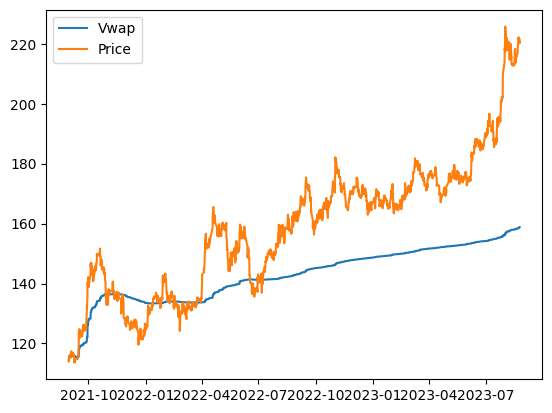

In [381]:
plt.plot(data['Vwap'],label='Vwap')
plt.plot(data['Typical'],label='Price')
plt.legend()

In [382]:
atr_multiplier = 1.2

data['UpperBand'] = data['Typical'] + atr_multiplier * data['ATR']
data['LowerBand'] = data['Typical'] - atr_multiplier * data['ATR']

In [383]:
buy_signals=[]
sell_signals=[]
signals=[]

status=''
for i in range(len(data)):
    if (data['Typical'][i] < data['LowerBand'][i] or data['Close'][i] < data['Vwap'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append(('SELL'))
        status = 'SELL'
    elif (data['Typical'][i] > data['UpperBand'][i] or data['Close'][i] > data['Vwap'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append(('BUY'))
        status = 'BUY'
    else:
        signals.append(('NONE'))

print(sell_signals)
print(buy_signals)
print(signals)

[5, 7, 15, 18, 42, 48, 72, 292, 309, 316, 343, 349, 358, 363, 372, 378, 402, 638, 701, 769, 772, 801, 816, 909, 917, 952, 1386, 1388, 1456, 1458, 1464, 1466, 1473, 1485]
[1, 6, 8, 17, 21, 45, 71, 75, 306, 310, 317, 347, 354, 360, 370, 373, 401, 636, 648, 708, 771, 773, 808, 908, 916, 951, 979, 1387, 1444, 1457, 1463, 1465, 1467, 1483, 1490]
['NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'SELL', 'BUY', 'SELL', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'BUY', 'SELL', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'BUY', 'SELL', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 

In [384]:
investment=100000 #100k
number_of_stocks=investment//(data['Close'][0])
in_hand = investment - number_of_stocks * data['Close'][0]
returns=[]

for i in range(len(signals)):
    if signals[i][1]=='BUY':
        temp = in_hand // data['Close'][i]
        in_hand -= temp * data['Close'][i]
        combined_number_of_stocks += temp
    elif signals[i][1]=='SELL':
        in_hand += combined_number_of_stocks * data['Close'][i]
        combined_number_of_stocks = 0
    returns.append(in_hand+number_of_stocks*data['Close'][i])

print("The return on investing 100000 rupees is:",returns[-1])

combined_percentage_returns=format((((returns[-1])-(investment))/investment)*(100),".2f")
print("The percentage return in case of combined strategy is:",combined_percentage_returns,"%")

The return on investing 100000 rupees is: 192600.29733276367
The percentage return in case of combined strategy is: 92.60 %


In [385]:
pnl=[]
for i in range(len(returns)):
    pnl.append(((returns[i]-investment)/investment)*100)
pnl[-1]

92.60029733276367

In [386]:
sharpe=(np.mean(pnl)-0.03)/np.std(pnl)
sharpe

1.9299660686518423